<h1 align='center' style='color:purple'>Clustering With K Means </h1>

In [36]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("income.csv")
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [38]:
#For Clustring all variables should be Numeric so Drop Name 
df.drop('Name',axis='columns', inplace=True)
df.head(2)

,Age,Income($)
0,27,70000
1,29,90000


Text(0, 0.5, 'Income($)')

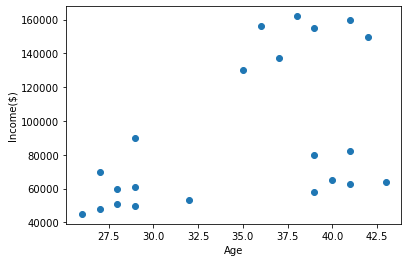

In [39]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [44]:
#Features should be on scale before clustering

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head(2)

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615


<h4 style='color:purple'>Elbow Plot</h4>

In [43]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)             #To find WSS number we use :(Km.inertia_)

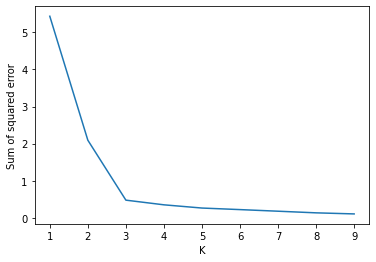

In [42]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## From Elbow plot Assigning k=3

In [29]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [30]:
df['cluster']=y_predicted
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1


In [31]:
#Cluster centers
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

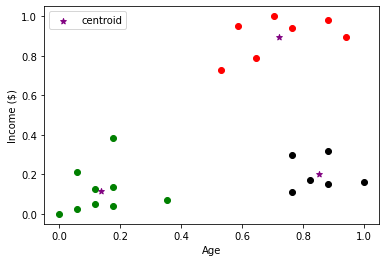

In [32]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [33]:
df['cluster']=y_predicted
df.head()

,Age,Income($),cluster
0,0.058824,0.213675,0
1,0.176471,0.384615,0
2,0.176471,0.136752,0
3,0.117647,0.128205,0
4,0.941176,0.897436,1
